In [2]:
import pandas as pd #biblioteca pandas - analise de dados
import matplotlib.pyplot as plt #biblioteca de graficos
from statsmodels.tsa.seasonal import seasonal_decompose #Time Series Analysis

In [3]:
#variável eel (tabela est_est_log)do tipo dataframe que serve para ler o arquivo csv que é a tabela est_est_log 
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv').set_index('id') 
#função que demonstra apenas as primeiras 5 instancias dessa tabela.
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [4]:
#variável do tipo dataframe utilizando a função query que serve como um filtro pendindo apenas a coluna "util" com numero de nascidos inferior a 200.
num_sex = eel.query("util == 'nasc'").query("num_nasc < 200")

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex', 'data_solic', 'data_forn', 'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_sex[c] = pd.to_datetime(num_sex[c], unit = 's') #indica o formato das datas
    
num_sex.head()    

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [5]:
#indica os nomes e valores de todas as linhagens - tentanto excluir linhagens não usadas
num_sex['ling'].value_counts()
num_sex = num_sex.query("ling !='Swiss' ")
num_sex.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [6]:
#Tirei as duplicatas e coloquei em ordem alfabética.
num_sex['ling'].drop_duplicates().sort_values()


id
3447          S129KO
2720          S129WT
2921        129/SV-E
10745          AG129
499           Balb/c
2928             C3H
2953         C57BL/6
513        C57BL06WT
17460         DBA/1J
381           S129KO
374           S129WT
603          Swiss A
123          Swiss B
118          Swiss C
122          Swiss D
116          Swiss E
4956       Swiss-1 A
4246       Swiss-1 B
4952       Swiss-1 C
5020       Swiss-1 D
4901       Swiss-1 E
4263       Swiss-2 A
4368       Swiss-2 B
4396       Swiss-2 C
4398       Swiss-2 D
4370       Swiss-2 E
2922       Swiss/CFW
3542     Swiss/CFW A
3544     Swiss/CFW B
3546     Swiss/CFW C
3514     Swiss/CFW D
5475            Test
Name: ling, dtype: object

In [7]:
tirar_ling = num_sex.query("ling != 'Test', 'AAA', 'Swiss', 'C57BL06WT\t', 'Swiss/CFW B', 'Swiss/CFW D',
                           'Swiss/CFW A', 'Swiss/CFW C', 'Swiss/CFW', 'Swiss-2', 'Swiss-2 A ', 'NZB/BINJ',
                           'NZW/LacJ','NOD / SHILTJ'")
tirar_ling

SyntaxError: EOL while scanning string literal (<ipython-input-7-5bb162fb5682>, line 1)

In [8]:
#chama as 5 primeiras linhas (instâncias)
num_sex.head() 

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [9]:
#tamanho - numero de entradas na coluna num_sex
len(num_sex) 

1810

In [10]:
#soma do numero de nascidos
num_sex['num_nasc'].sum() 

15147

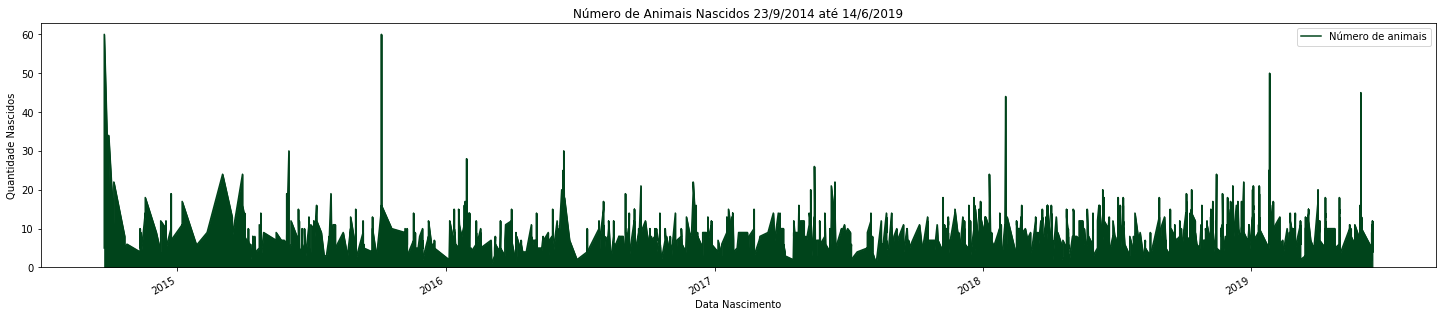

In [11]:
#Gerando o primeiro gráfico: Numero de nascidos na ordem de menor a maior data.

inic = num_sex.loc[num_sex.index.min(), "date_hoje"] #loc: localizador - localizando a primeira data
fim = num_sex.loc[num_sex.index.max(), "date_hoje"] #localizando a ultima data

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Organização da plotagem do gráfico

num_sex.plot(
        kind='area',
        x='date_hoje',
        y='num_nasc',
        figsize=(25, 5),
        colormap='Greens_r',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')
plt.savefig('../resultados/Número de animais.pdf')

Text(0, 0.5, 'Quantidade Nascidos')

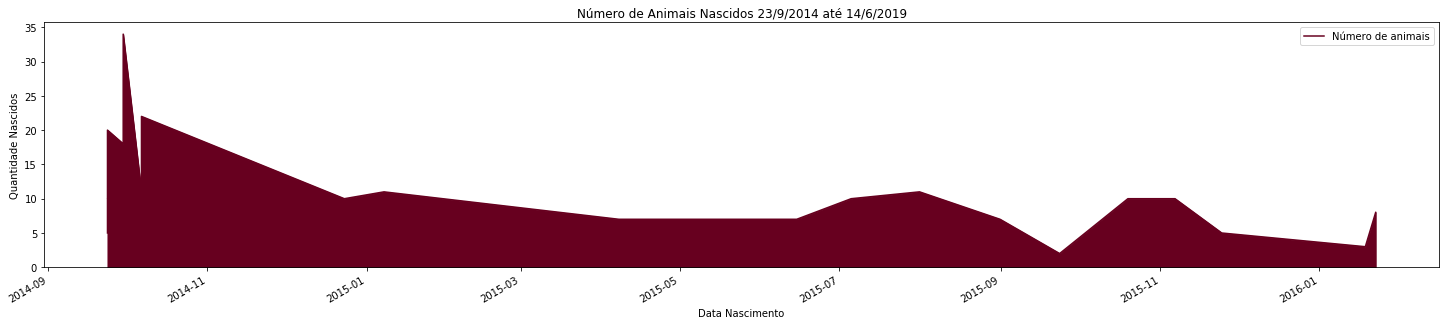

In [12]:
#Numero de nascidos por linhagem
num_sex.query("ling == 'Swiss E'").plot( #filtrando a coluna ling e pedindo por linhagem 
        kind='area', #tipo de grafico
        x='date_hoje',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
#acima no title está sendo indicado por dia, mes e ano da primeira entrada até a última.

plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')

In [13]:
#localizar a primeira data
num_sex.loc[num_sex.index.min(), 'date_hoje'] 

Timestamp('2014-09-23 17:40:33')

In [14]:
#localizar a ultima data
num_sex.loc[num_sex.index.max(), 'date_hoje'] 

Timestamp('2019-06-14 14:04:31')

In [15]:
tsAno.iloc[:-1]

NameError: name 'tsAno' is not defined

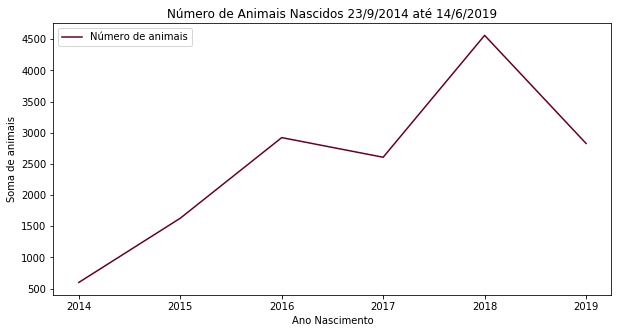

In [15]:
#número de animais que nascem em média no biotério
#1) pergunta: nascidos no total de 5 anos.
temp_num_sex = pd.DataFrame(num_sex['date_hoje'])
temp_num_sex['num_nasc'] = num_sex['num_nasc']
temp_num_sex = temp_num_sex.set_index('date_hoje')
#num_sex.query("ling == 'Balb/c'").plot(




tsAno = temp_num_sex.resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados
#tsAno = num_sex.query("ling == 'Balb/c'").plot(
#tsAno.query("ling == 'Balb/c'").plot(
tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig('../resultados/Número de animais nascidos 09-14 a 06-19.png')

Text(0, 0.5, 'Quantidade Nascidos')

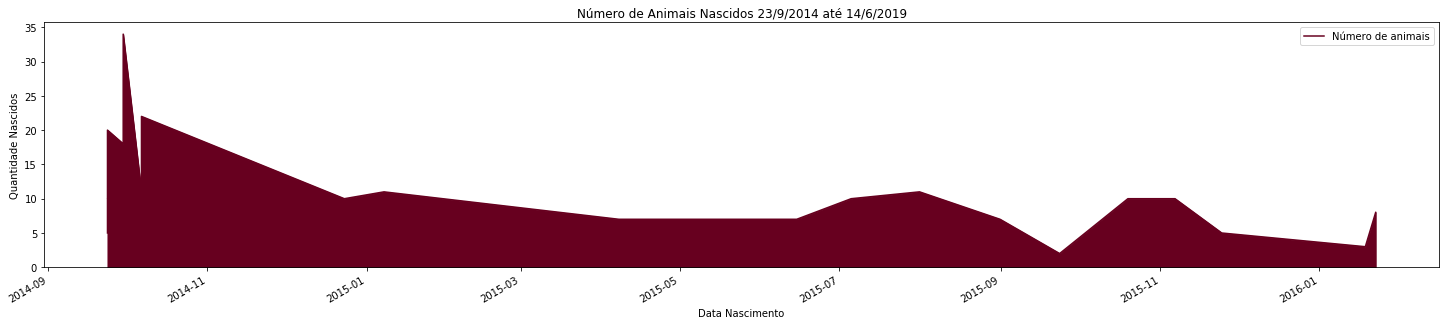

In [16]:
#Dia do acasalamneto até o nascimento dentro das linhagens
acas = pd.DataFrame(num_sex['date_nasc_acas'])
num_sex.query("ling == 'Swiss E'").plot( #ver erro 
        kind='area', #tipo de grafico
        x='date_hoje',
        y='num_nasc',
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Data Nascimento')
plt.ylabel('Quantidade Nascidos')

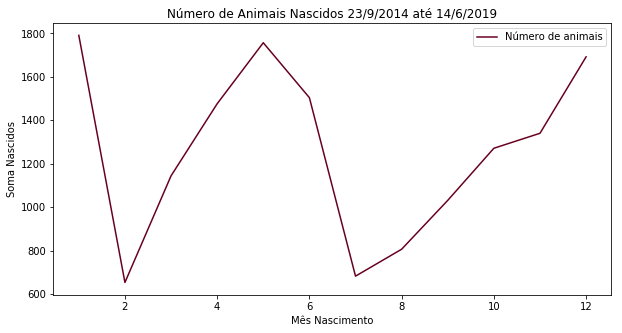

In [17]:
#2) pergunta: nascidos mês a mês
tsMes = temp_num_sex.groupby([lambda x: x.month]).sum() # agrupamento por mes
tsMes.plot(
        figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos') #identificação eixo y
plt.savefig('../resultados/Número de animais soma dos meses.png')

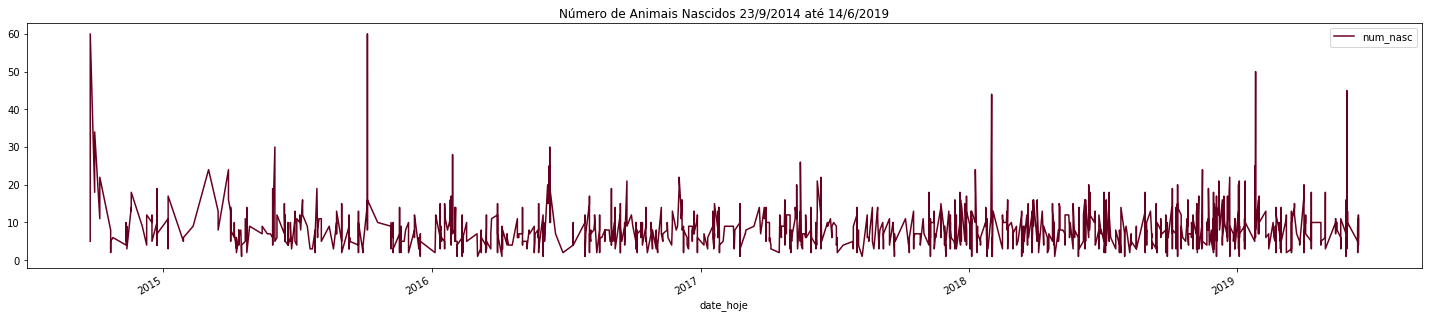

In [18]:
temp_num_sex.plot(
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)

In [19]:
def soma(a, b):
    return a+b

soma(2,3)

5

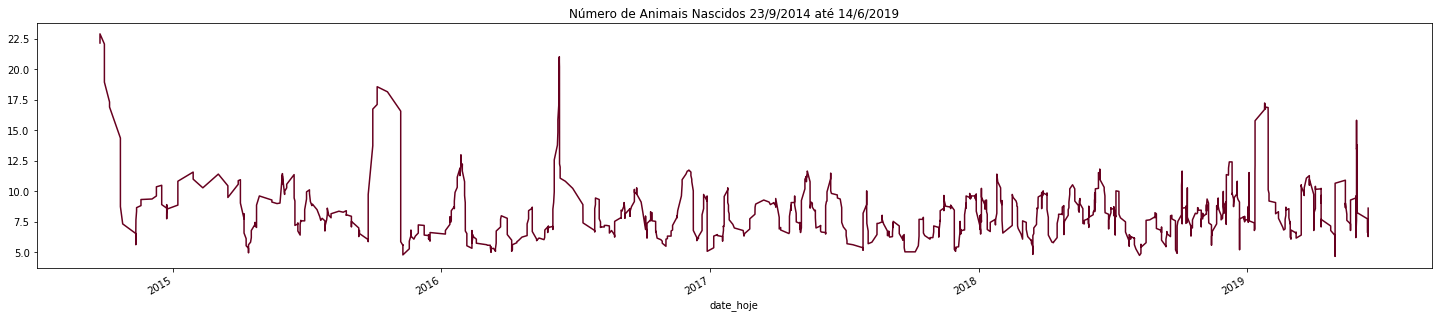

In [20]:
ts = temp_num_sex['num_nasc']
dec = seasonal_decompose(ts, freq=12)
dec.trend.plot(
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)

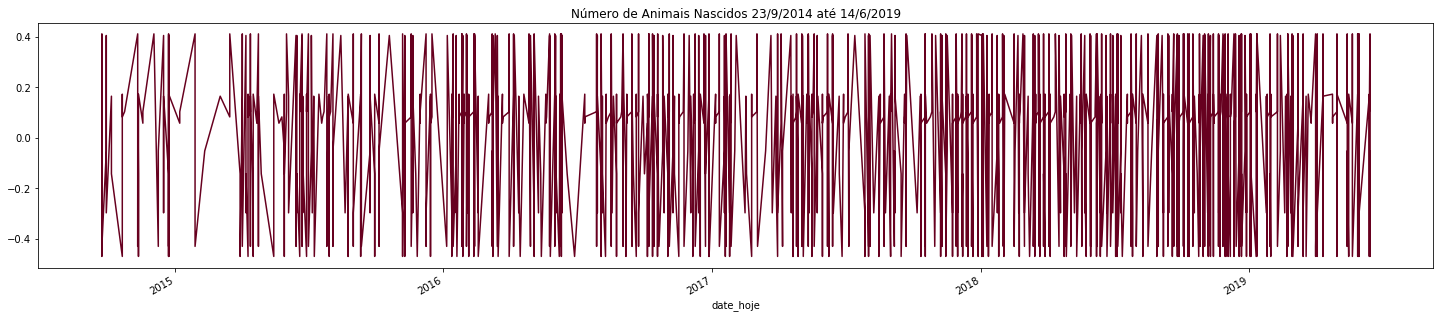

In [21]:
dec.seasonal.plot(
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)

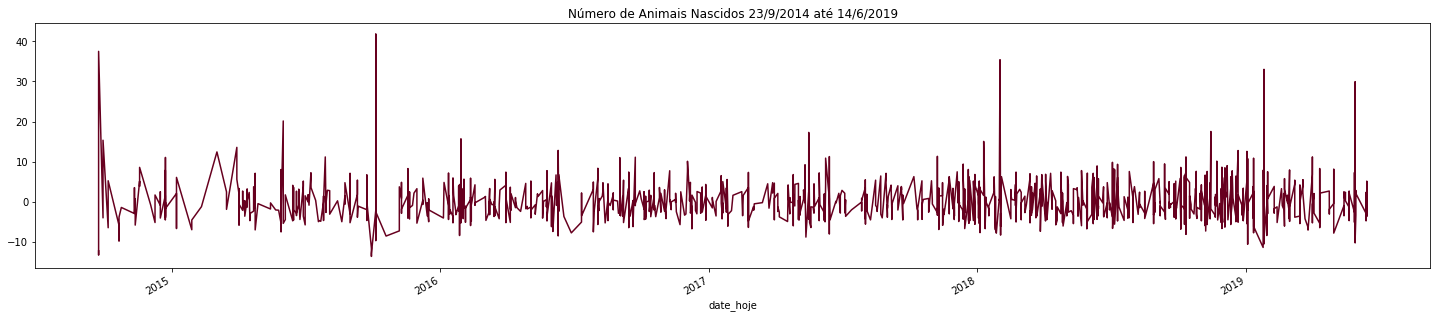

In [22]:
dec.resid.plot(
        figsize=(25, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)

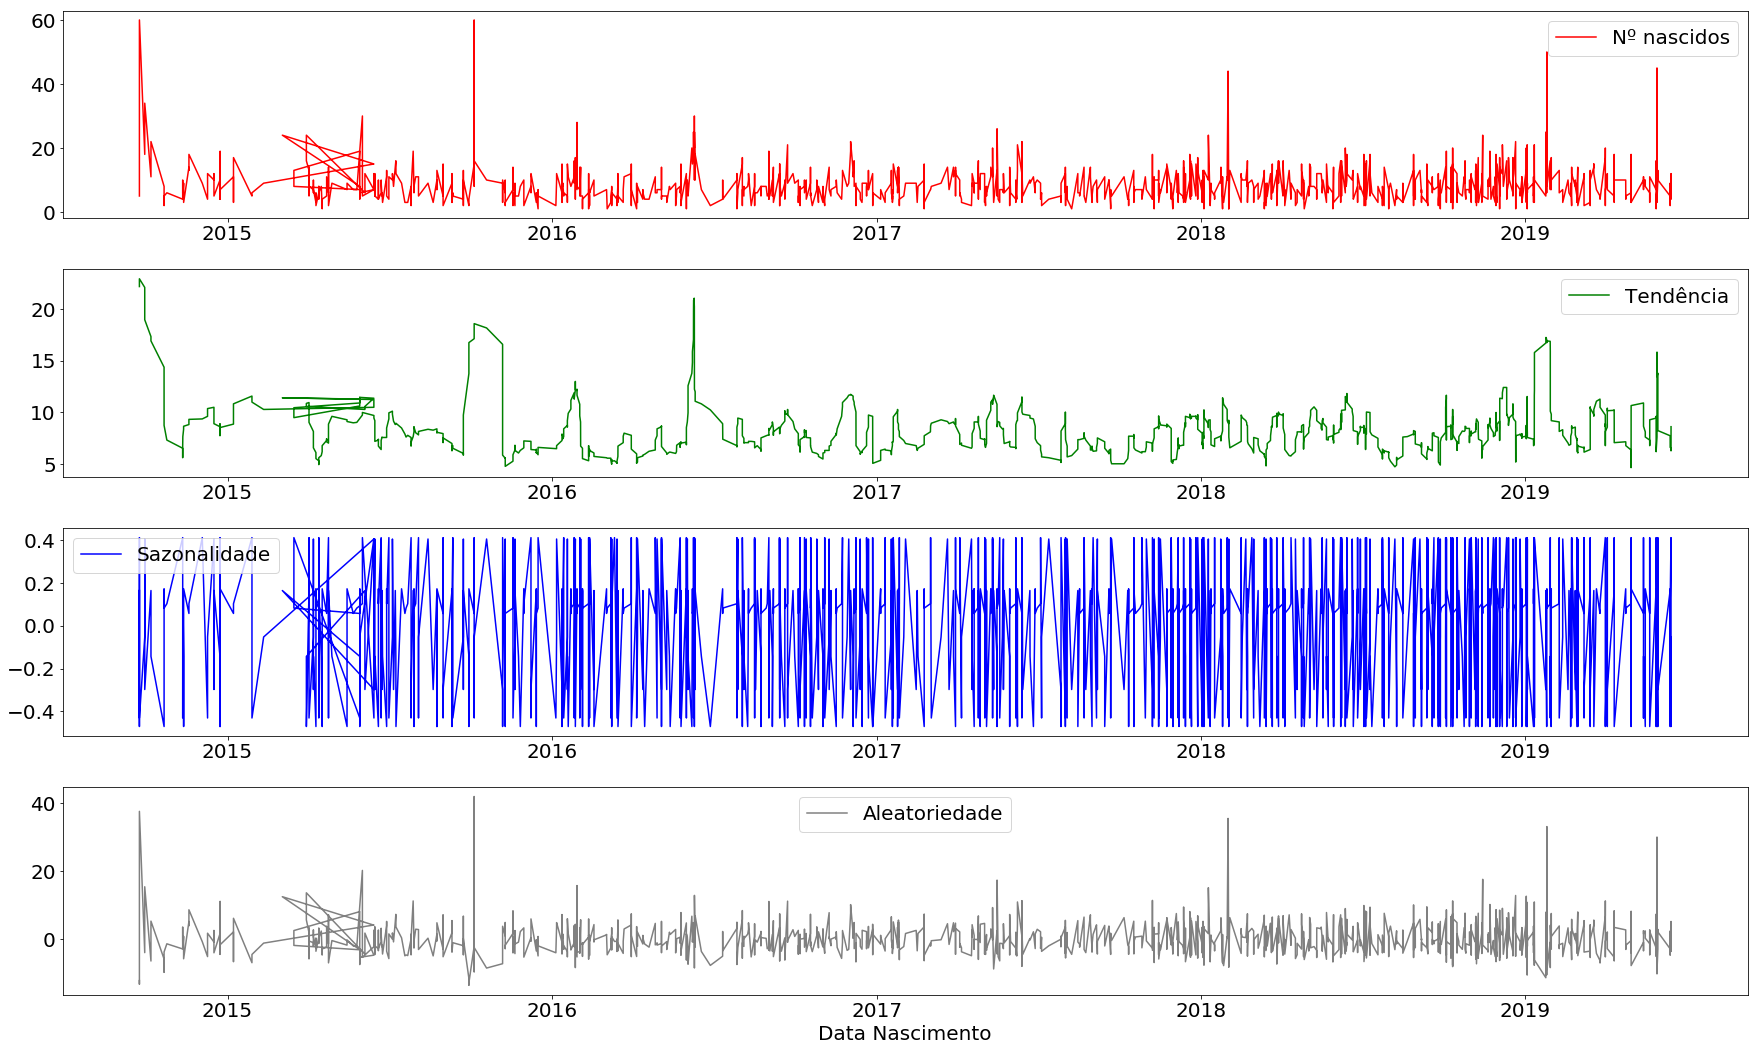

In [23]:
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])

plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


plt.subplot(4, 1, 1)
plt.plot(ts, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(dec.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(dec.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(dec.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()


plt.savefig('../resultados/grafico de tendencia-sazonalidade-ruido-20.png')

In [ ]:
'''
# Transforma time() em data
import time
timestamp = num_sex.loc[num_sex.index[len(num_sex)-1:], 'date_hoje']
fim = time.strftime("%Y-%m-%d", time.localtime(timestamp))
fim

# Cria nova DataFrame com duas colunas e index
temp_num_sex = pd.DataFrame(num_sex['date_hoje'])
temp_num_sex['num_nasc'] = num_sex['num_nasc']
temp_num_sex = temp_num_sex.set_index('date_hoje')
temp_num_sex.plot(figsize=(25, 5))
'''